<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/Titanic_nnet_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공신경망


In [27]:
# 신경망 R 코드 함수 다운로드
install.packages("nnet")
library(nnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
# 시각화 R 코드 함수 다운로드
install.packages("devtools")
library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

ℹ SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef



In [29]:
# 신경망 모형 시각화
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
# 신경망 모델에서 각 변수의 중요도 확인
install.packages("NeuralNetTools")
library(NeuralNetTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



문법 : nnet(formula, data, size, maxit, decay=5e-04)

신경망을 잘 사용하려면 데이터에 정규화를 적용한 뒤 모델을 만들어야 한다.

정규화가 절대적인 의무 사항은 아니지만 정규화를 적용하면 지역 해(local minimum)에 빠질 위험을 피한다.

In [34]:
#titan_1 데이터 준비 : 앞 예제에서 사용했던 데이터 재사용
titanic <- read.csv("titanic3.csv")  #데이터 불러오기
titanic <- titanic[ ,!names(titanic) %in% c("boat","body","home.dest") ]
titanic$pclass <- as.factor(titanic$pclass) #데이터 타입 변환
titanic$sex <- as.factor(titanic$sex)
titanic$embarked <- as.factor(titanic$embarked)
titanic$survived <- factor(titanic$survived, levels=c(0,1), labels=c("dead","survived"))
levels(titanic$embarked)[1] <- NA #빈칸 NA로 대치
titanic <- titanic[complete.cases(titanic[ ,9]), ] #결측치 제거
titanic <- titanic[complete.cases(titanic[ ,11]), ] #결측치 제거
titanic <- within( titanic, {
  age_1 = character(0) 
  age_1[ age <= 16 ] = "A" 
  age_1[ age >16 & age <= 32 ] = "B" 
  age_1[ age >32 & age <= 48 ] = "C" 
  age_1[ age >48 & age <= 64 ] = "D" 
  age_1[ age >64 ] = "E"
  age_1 = factor(age_1, level = c("A", "B", "C", "D", "E"))
})
titanic <- titanic %>% mutate(Family=sibsp+parch)
set.seed(1234)
idx<- sample(1:nrow(titanic), size=nrow(titanic)*0.7,replace=FALSE)
train <- titanic[idx,]
train_1 <- train[,c("pclass","survived","sex","age_1","fare","embarked","Family")]

In [35]:
#은닉 노드(Hidden Node)의 개수 2
set.seed(1234)
nn.model1<- nnet(survived~., data=train_1, size=2, maxit=1000, decay=5e-4)

# weights:  27
initial  value 503.770851 
iter  10 value 481.010830
iter  20 value 420.767551
iter  30 value 384.334511
iter  40 value 320.645375
iter  50 value 311.852474
iter  60 value 310.826866
iter  70 value 308.742182
iter  80 value 300.791802
iter  90 value 291.044053
iter 100 value 283.942211
iter 110 value 278.606517
iter 120 value 277.228905
iter 130 value 277.037854
iter 140 value 276.939491
iter 150 value 276.610767
iter 160 value 276.407371
iter 170 value 276.351775
iter 180 value 276.289041
iter 190 value 276.277421
iter 200 value 276.258165
iter 210 value 276.117232
iter 220 value 276.069454
iter 230 value 276.060096
final  value 276.058646 
converged


In [36]:
#은닉 노드(Hidden Node)의 개수 3
nn.model2<- nnet(survived~., data=train_1, size=3, maxit=1000, decay=5e-4)

# weights:  40
initial  value 554.000563 
iter  10 value 437.768857
iter  20 value 335.977274
iter  30 value 299.316860
iter  40 value 288.952961
iter  50 value 286.594976
iter  60 value 283.749364
iter  70 value 282.538798
iter  80 value 282.143020
iter  90 value 281.971617
iter 100 value 281.884349
iter 110 value 281.844844
iter 120 value 281.837759
iter 130 value 281.836064
final  value 281.828985 
converged


In [37]:
summary(nn.model1)

a 11-2-1 network with 27 weights
options were - entropy fitting  decay=5e-04
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   1.67   -2.10    2.29   -0.69   -1.57   -1.57   -2.05   -2.76   -0.01    1.00 
i10->h1 i11->h1 
   0.56    0.62 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.46   -0.61    1.85    0.34    0.15    0.19    0.03    2.11    0.00    0.73 
i10->h2 i11->h2 
   0.42    0.24 
  b->o  h1->o  h2->o 
 10.79  19.43 -33.22 

In [38]:
summary(nn.model2)

a 11-3-1 network with 40 weights
options were - entropy fitting  decay=5e-04
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
 -31.47  -15.87   -3.87   13.78   12.10   11.30   18.74   21.74   -0.06    4.47 
i10->h1 i11->h1 
   3.88    5.81 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  28.40    1.45  -22.23  -12.90   -6.62   -7.38    4.19    0.00    0.17   -5.69 
i10->h2 i11->h2 
  -8.80   -4.34 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  30.62   -7.90    0.26  -21.72   -7.60   -8.45   -7.42  -11.61   -0.04    0.10 
i10->h3 i11->h3 
  -0.51    1.94 
  b->o  h1->o  h2->o  h3->o 
 -5.11  -2.45   3.08   5.00 

Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, lo

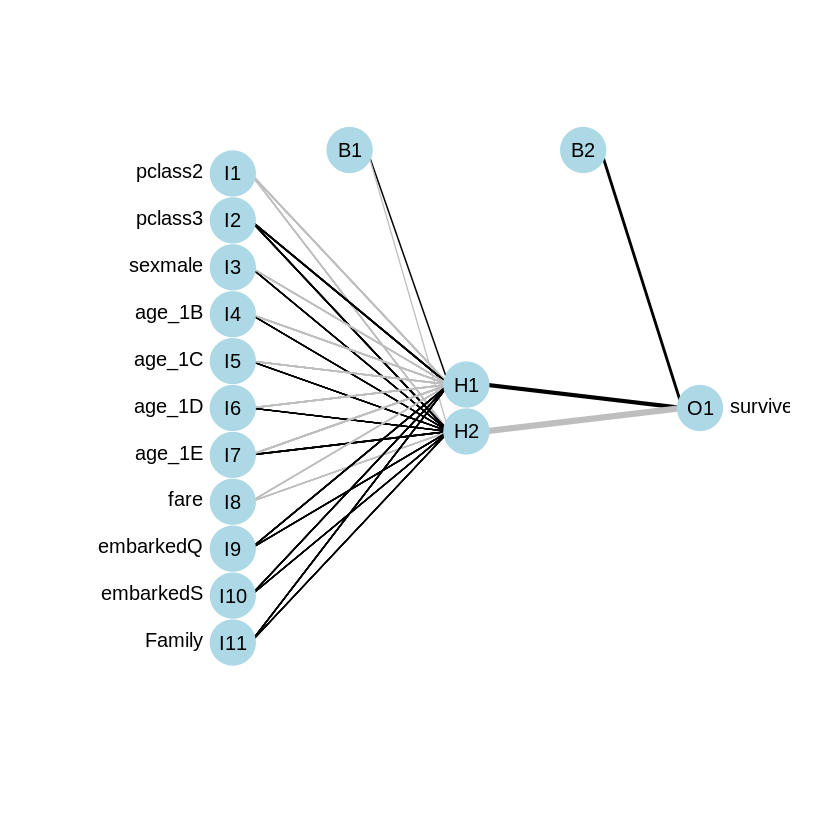

In [43]:
plot.nnet(nn.model1)

11개의 입력 노드, 2개의 은닉 노드, 1개의 출력 노드, 2개의 상수항을 확인할 수 있다.